# Loading modules

In [2]:
import numpy as np
import scipy as sp
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt
import glob
import bbknn

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100)
sc.logging.print_version_and_date()

Running Scanpy 1.3.1 on 2018-11-27 16:16.


# Load dataset

The object can be downloaded from [ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/PBMC.merged.h5ad](ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/PBMC.merged.h5ad)

In [3]:
adata = sc.read("PBMC.merged.h5ad")

## Conventional KNN

In [4]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:09.48) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [5]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:15.92) --> added
    'X_umap', UMAP coordinates (adata.obsm)


saving figure to file ./figures/umapFig2A_Method.pdf


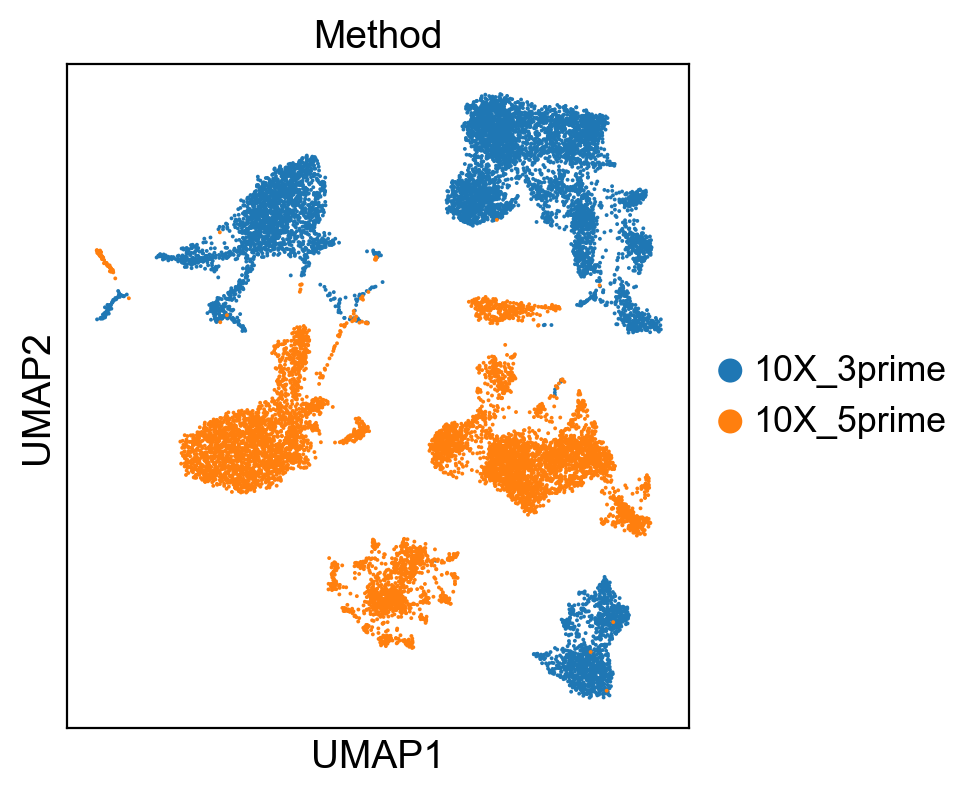

In [6]:
sc.pl.umap(adata,color='Method',save='Fig2A_Method')

In [7]:
sc.tl.louvain(adata,resolution=2.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01.82) --> found 33 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


saving figure to file ./figures/umapFig2A_CellType.pdf


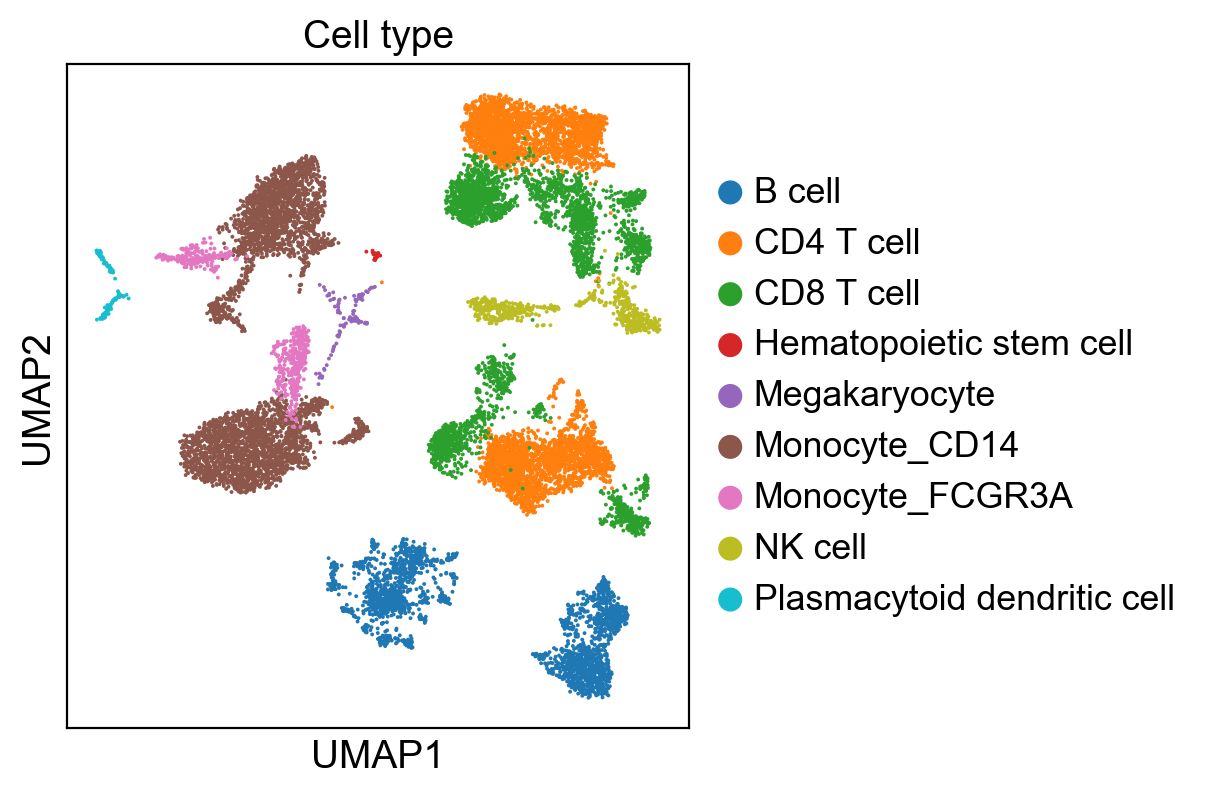

In [8]:
sc.pl.umap(adata,color='Cell type',save='Fig2A_CellType')

## Run bbknn

In [9]:
bdata = bbknn.bbknn(adata,batch_key='Sample',copy=True)

computing batch balanced neighbors
    finished (0:00:05.77) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [10]:
sc.tl.umap(bdata)

computing UMAP
    finished (0:00:10.14) --> added
    'X_umap', UMAP coordinates (adata.obsm)


saving figure to file ./figures/umapFig2B_Method.pdf


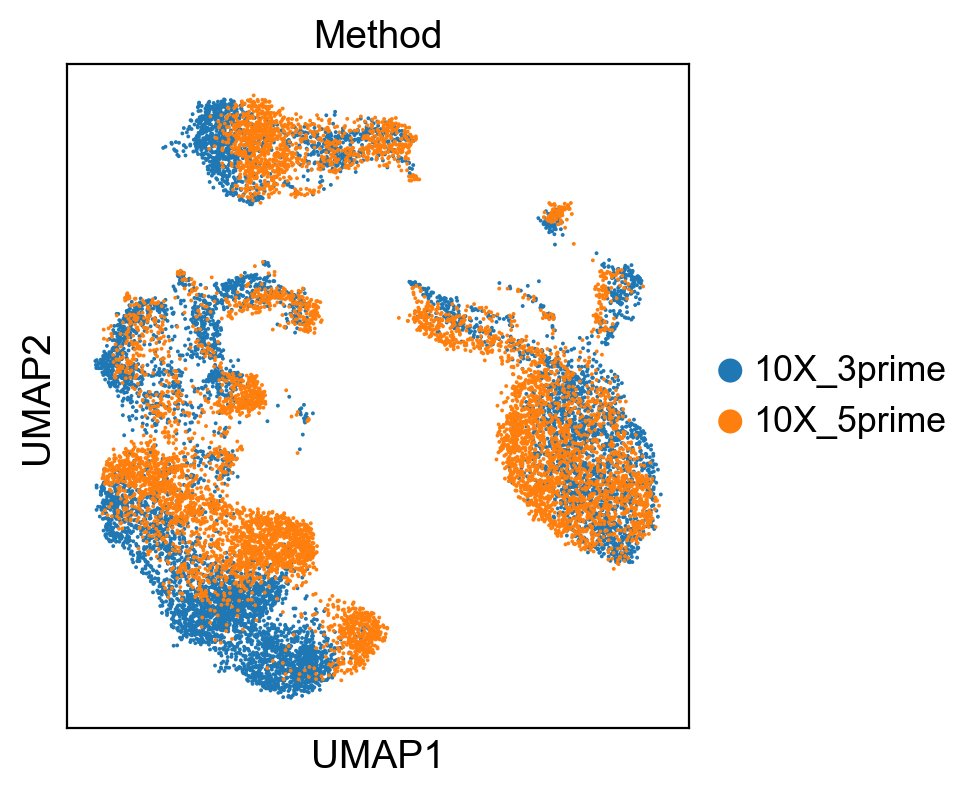

In [11]:
sc.pl.umap(bdata,color='Method', save="Fig2B_Method")

saving figure to file ./figures/umapFig2B_Celltype.pdf


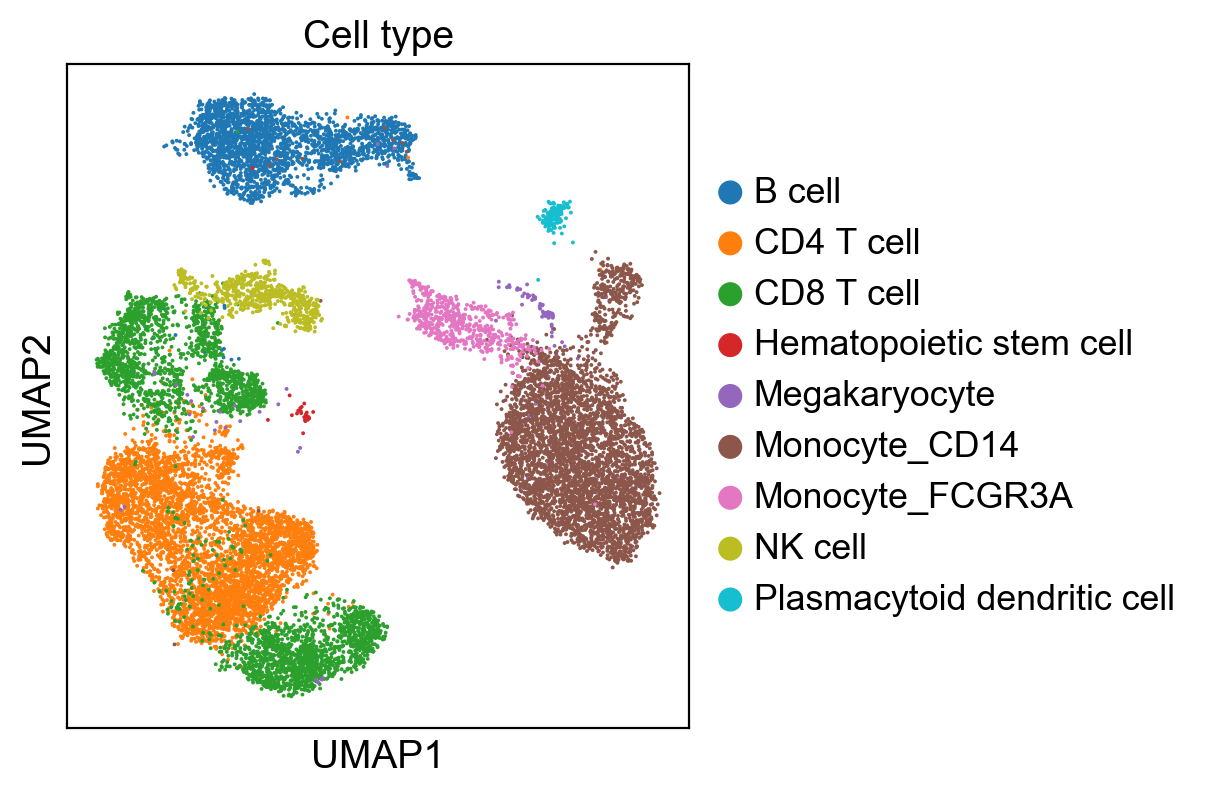

In [12]:
sc.pl.umap(bdata,color='Cell type', save = "Fig2B_Celltype")

Canonical marker genes used when proposing the cell type annotation displayed above.

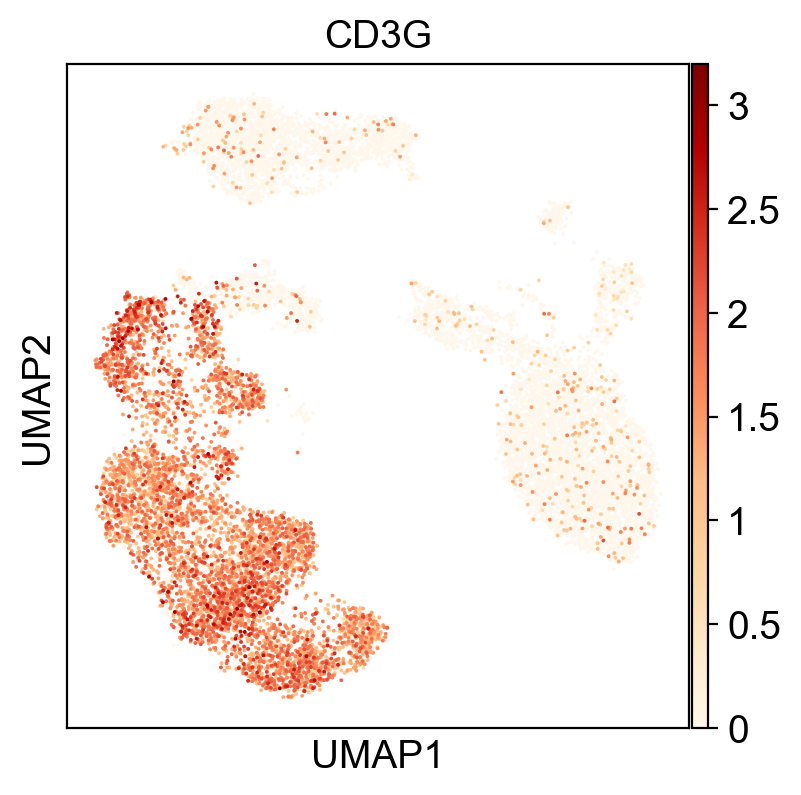

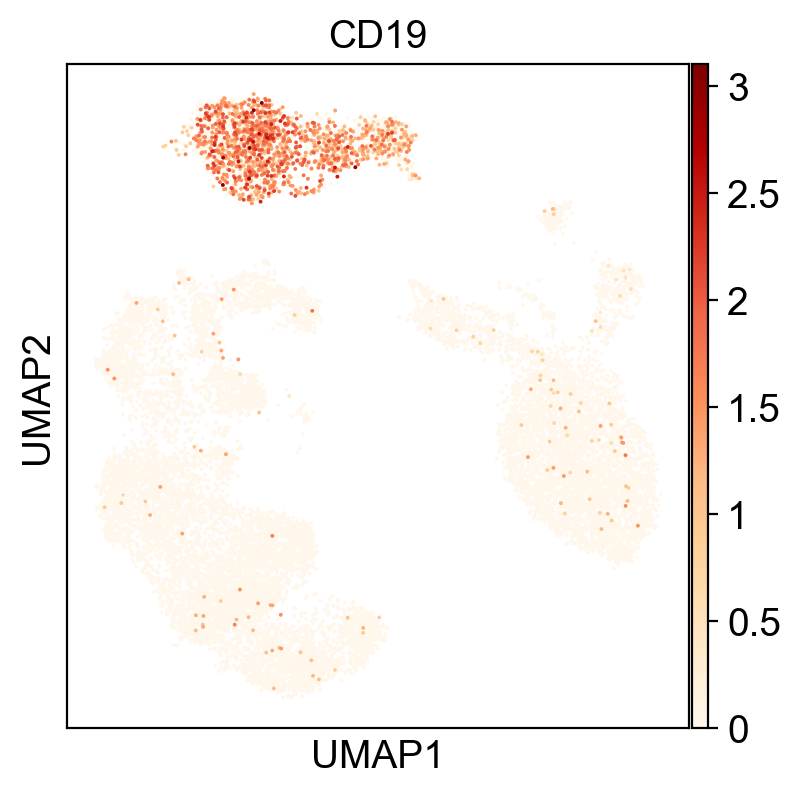

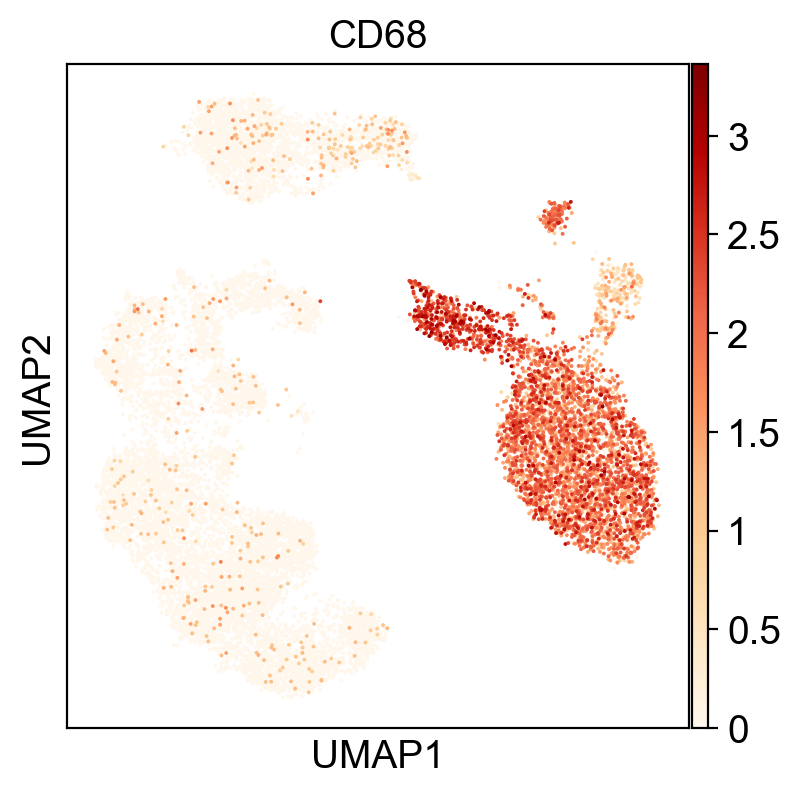

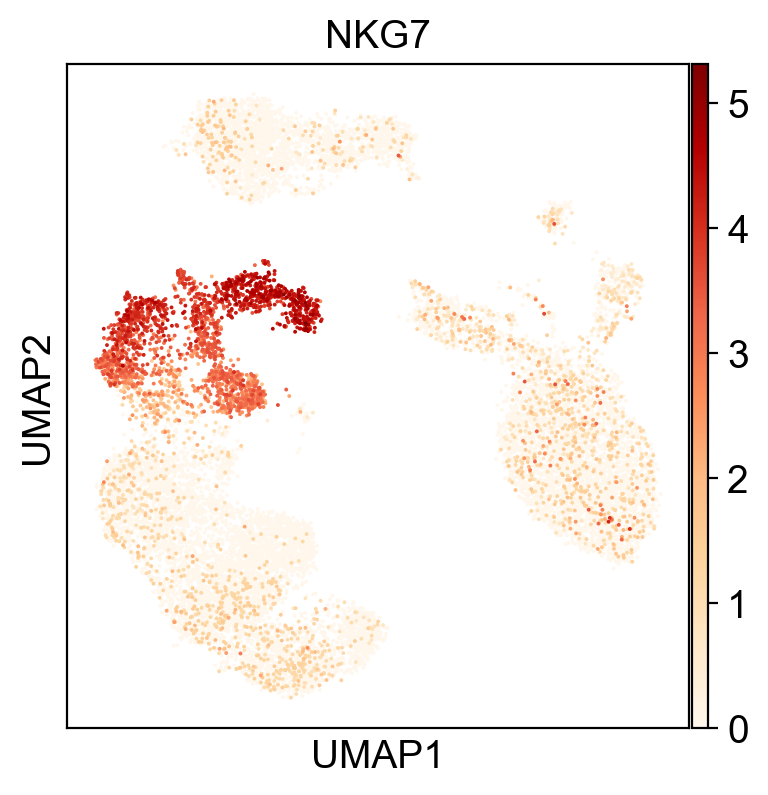

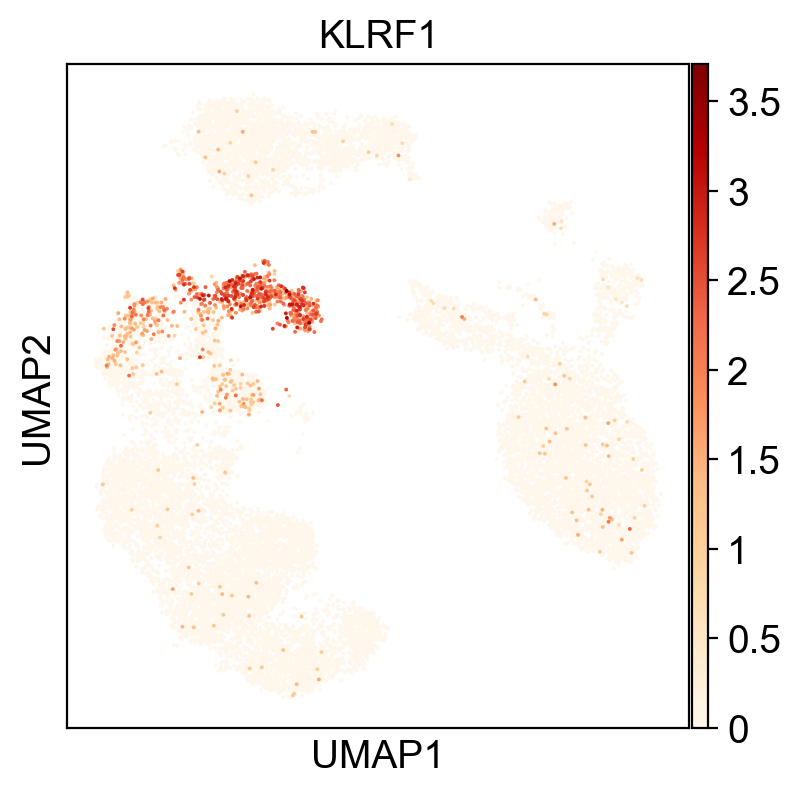

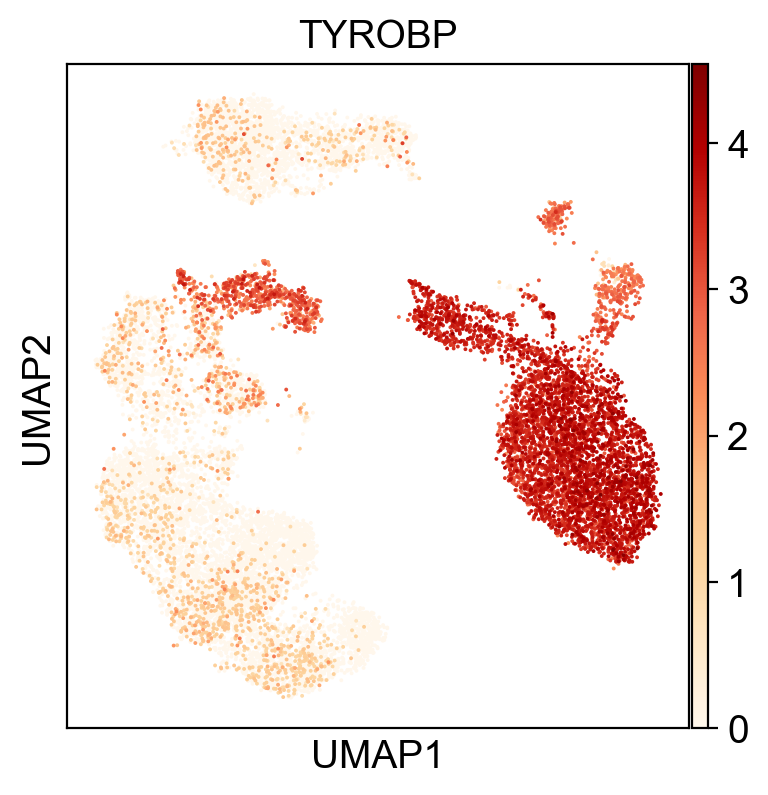

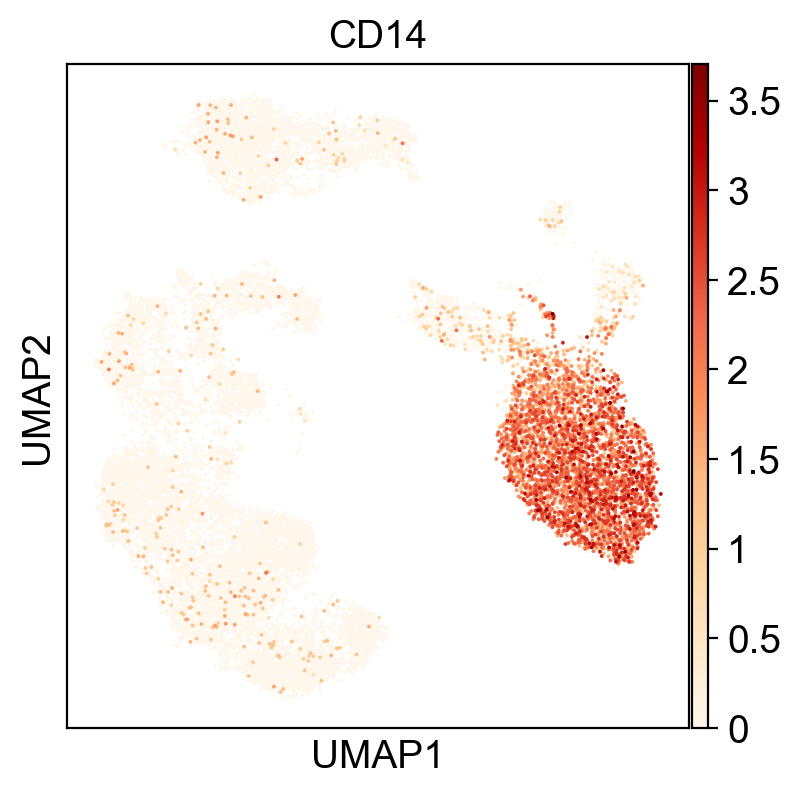

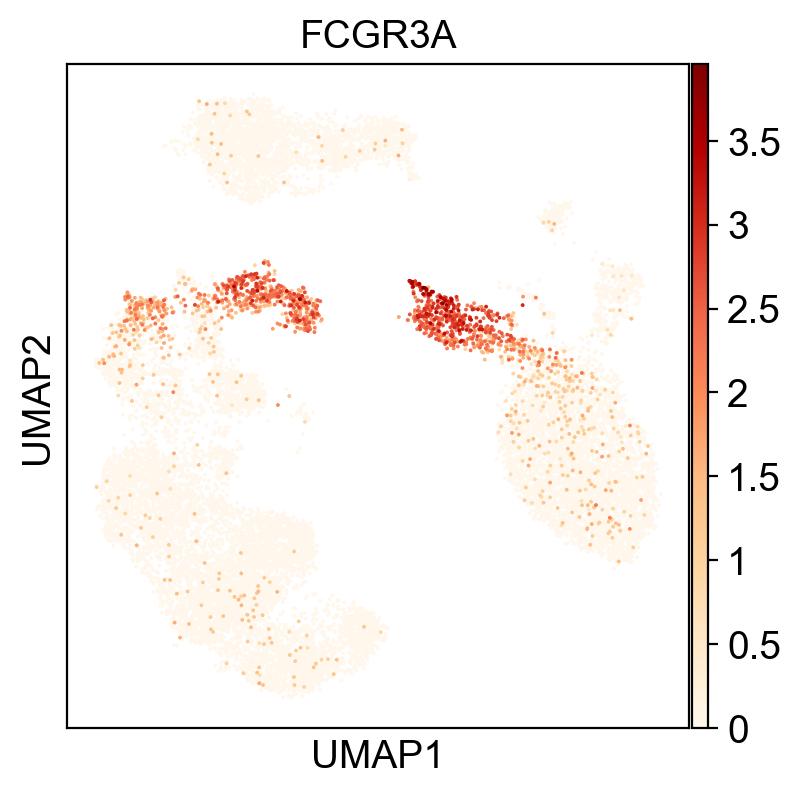

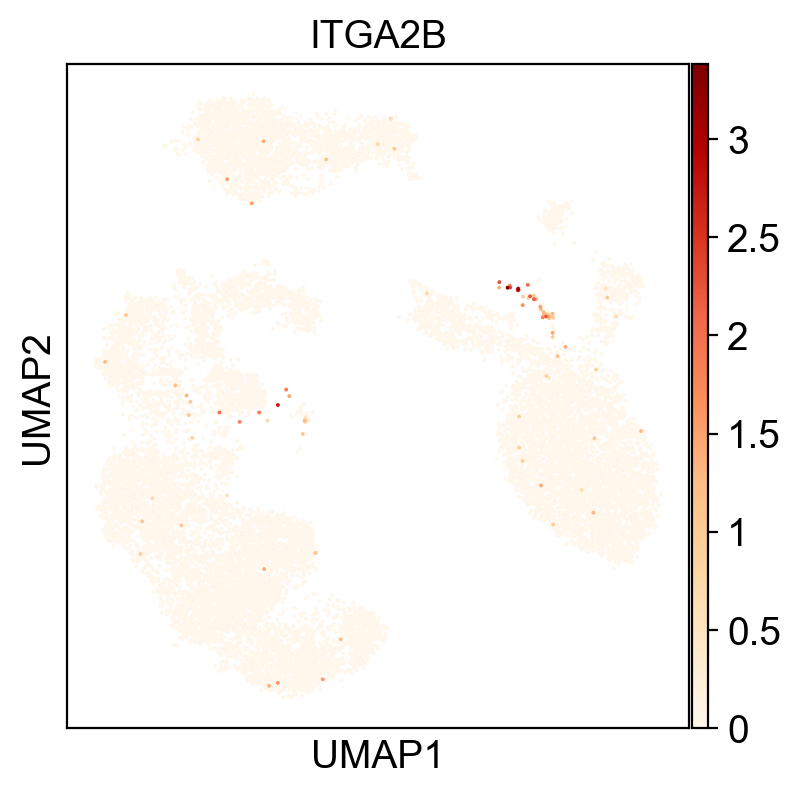

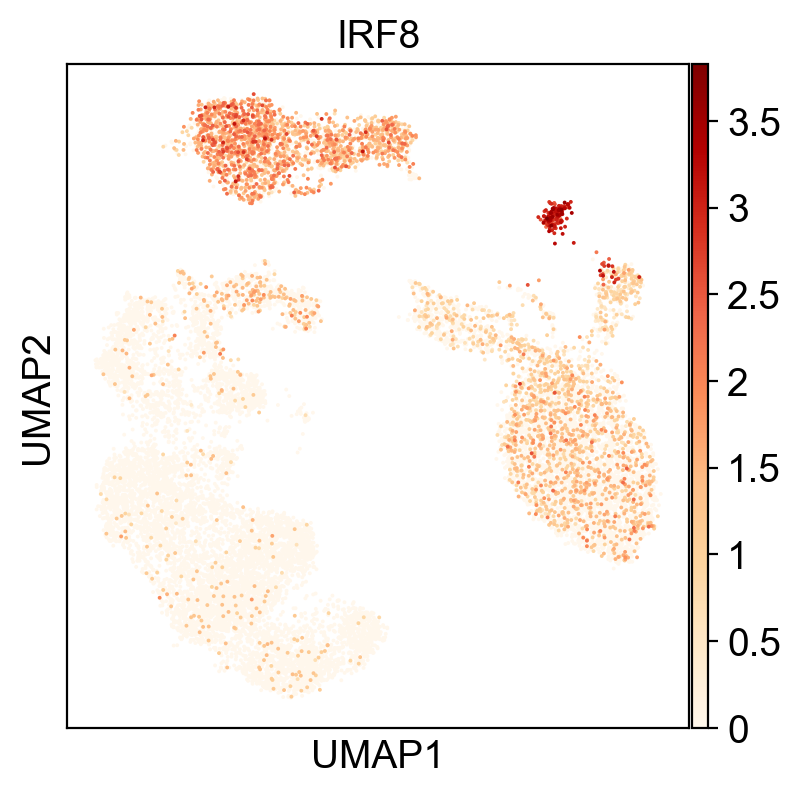

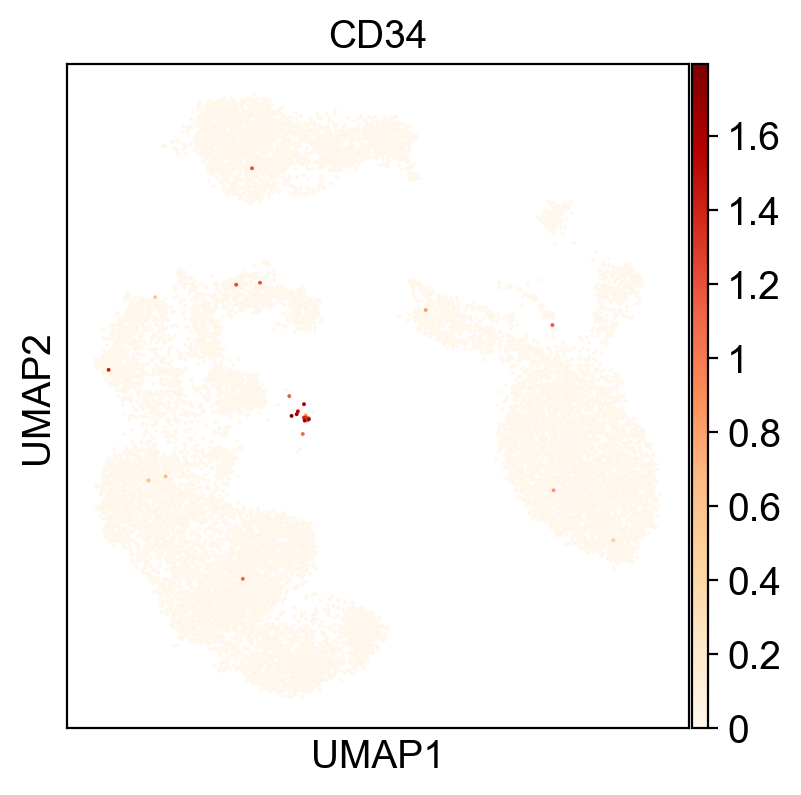

In [13]:
for gene in ["CD3G","CD19","CD68","NKG7","KLRF1","TYROBP","CD14","FCGR3A","ITGA2B","IRF8","CD34"]:
    sc.pl.umap(bdata,color=gene, color_map='OrRd')

Check expression of TCR constant and variable genes

In [14]:
bdata.obs['TRAV'] = np.sum(bdata.raw[:,bdata.raw.var_names.str.startswith("TRAV")].X.todense(),axis=1).A1

In [15]:
bdata.obs['TRBV'] = np.sum(bdata.raw[:,bdata.raw.var_names.str.startswith("TRBV")].X.todense(),axis=1).A1

In [16]:
bdata.obs['IGHV'] = np.sum(bdata.raw[:,bdata.raw.var_names.str.startswith("IGHV")].X.todense(),axis=1).A1

saving figure to file ./figures/umapFig2D_TRAC.pdf


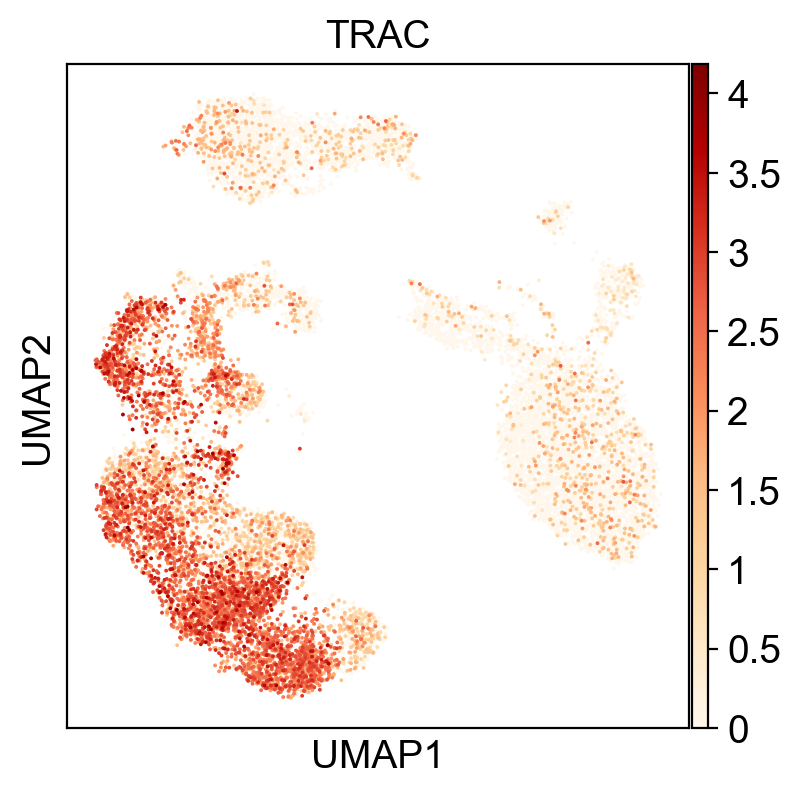

saving figure to file ./figures/umapFig2D_TRBV.pdf


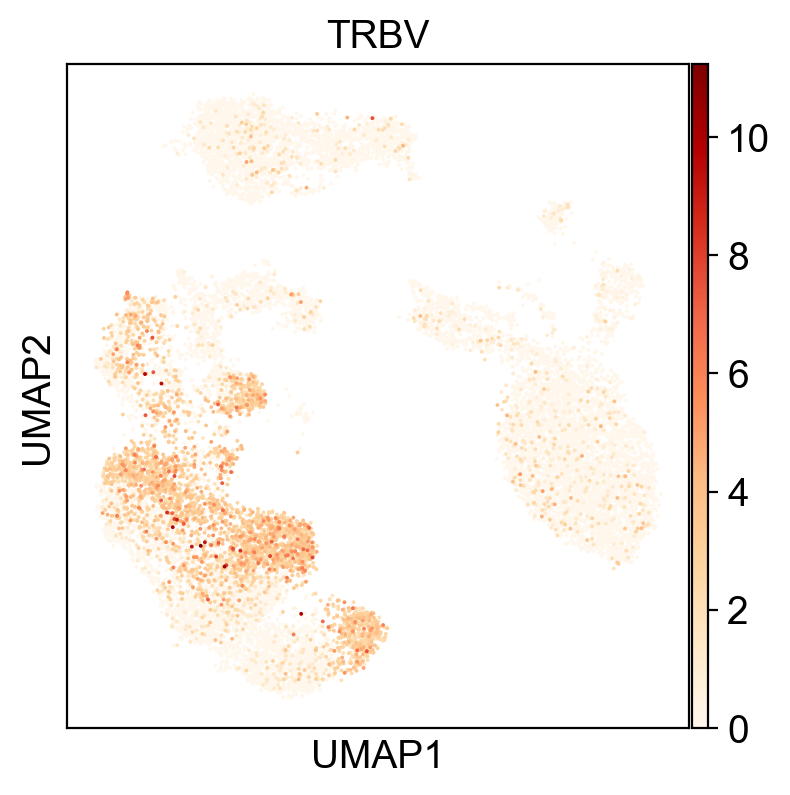

saving figure to file ./figures/umapFig2D_TRAV.pdf


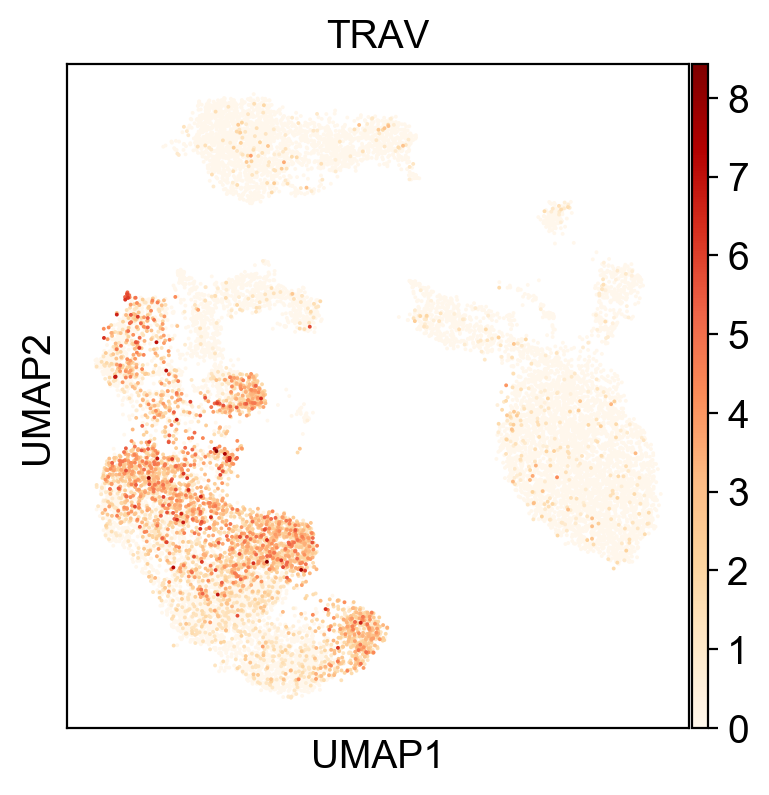

saving figure to file ./figures/umapFig2D_IGHV.pdf


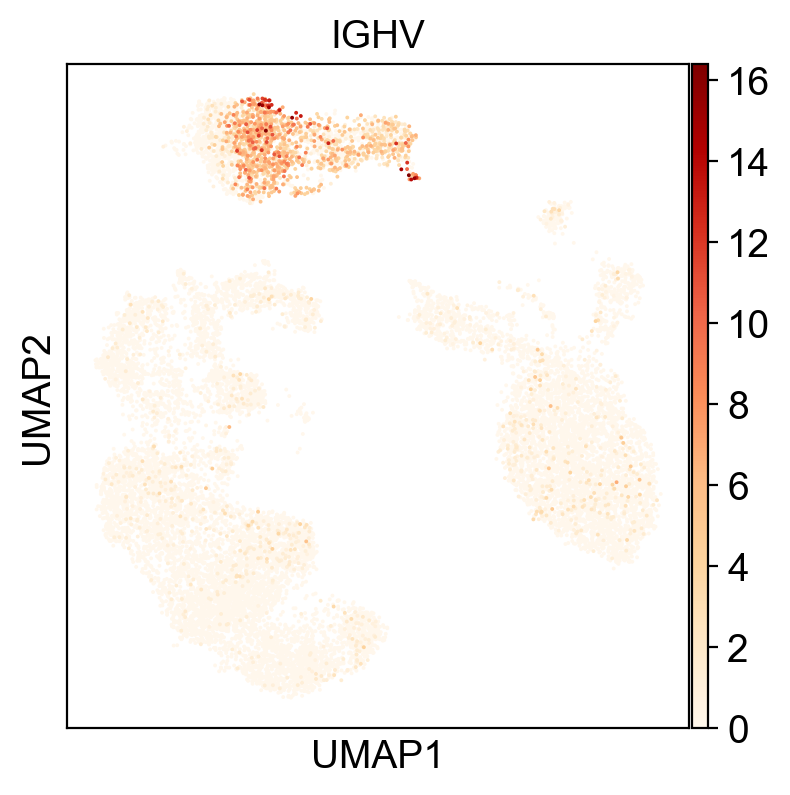

In [17]:
for gene in ["TRAC","TRBV","TRAV","IGHV"]:
    sc.pl.umap(bdata,color=gene,save="Fig2D_%s"%(gene), color_map='OrRd')